In [5]:
import pandas as pd
import numpy as np

In [60]:
!pip install folium
import folium

     |████████████████████████████████| 94 kB 2.3 MB/s eta 0:00:01
You should consider upgrading via the '/anaconda3/bin/python -m pip install --upgrade pip' command.


In [6]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

In [33]:
access = pd.read_excel('FoodEnvironmentAtlas.xls', sheet_name = 'ACCESS')
access.head(5)

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
0,1001,AL,Autauga,18428.439685,17496.693038,-5.056026,33.769657,32.062255,5344.427472,6543.676824,...,471.136164,0.863345,86.767975,0.159000,61.169869,0.112092,8.817961,0.016159,482.848633,0.884808
1,1003,AL,Baldwin,35210.814078,30561.264430,-13.204891,19.318473,16.767489,9952.144027,9886.831137,...,1377.874834,0.755973,212.946378,0.116833,181.649648,0.099662,14.819634,0.008131,1127.696098,0.618712
2,1005,AL,Barbour,5722.305602,6069.523628,6.067799,20.840972,22.105560,3135.676086,2948.790251,...,509.377525,1.855183,17.096410,0.062266,39.960527,0.145539,8.082376,0.029436,462.382655,1.684025
3,1007,AL,Bibb,1044.867327,969.378841,-7.224696,4.559753,4.230324,491.449066,596.162829,...,8.596762,0.037516,1.994318,0.008703,2.513097,0.010967,0.000000,0.000000,5.259244,0.022951
4,1009,AL,Blount,1548.175559,3724.428242,140.568857,2.700840,6.497380,609.027708,1650.959482,...,497.489891,0.867886,8.428994,0.014705,28.938242,0.050484,1.062851,0.001854,202.914187,0.353990


In [34]:
access.shape

(3143, 44)

In [35]:
# filtering for the state of Illinois
access_il = access[access['State'] == 'IL']

In [36]:
# 102 counties in Illinois
access_il.shape

(102, 44)

In [37]:
access_il.head()

,FIPS,State,County,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
595,17001,IL,Adams,10505.232658,10346.464755,-1.511322,15.655384,15.418781,2358.654003,2127.848125,...,76.176353,0.113522,97.126168,0.144742,6.172524,0.009199,2.950948,0.004398,116.507333,0.173625
596,17003,IL,Alexander,3858.855610,1748.049110,-54.700323,46.842141,21.219339,1724.005623,1030.380811,...,44.600654,0.541401,4.584026,0.055645,7.445494,0.090380,0.000000,0.000000,59.459911,0.721776
597,17005,IL,Bond,2080.987933,1281.433552,-38.421865,11.711999,7.212030,680.747353,482.174745,...,43.735033,0.246145,17.882474,0.100644,8.937367,0.050300,0.000000,0.000000,27.109366,0.152574
598,17007,IL,Boone,9063.970399,11409.517784,25.877703,16.733999,21.064373,1327.180363,2607.274937,...,1694.814104,3.128984,186.853148,0.344970,17.679592,0.032640,6.000000,0.011077,1027.583368,1.897135
599,17009,IL,Brown,1910.444209,1662.659777,-12.969990,27.539919,23.967994,829.972100,905.915032,...,261.808138,3.774083,3.852739,0.055539,6.418662,0.092528,1.000000,0.014415,214.858491,3.097283


In [38]:
access_il.describe()

,FIPS,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
count,102.000000,102.000000,101.000000,1.010000e+02,102.000000,101.000000,102.000000,101.000000,1.010000e+02,102.000000,...,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000,101.000000
mean,17102.000000,23825.853210,22723.436538,2.186698e+05,19.647202,19.560857,5435.952860,5673.386023,2.213137e+05,6.332886,...,1952.918799,0.781613,1005.301470,0.225775,59.290482,0.044495,7.318678,0.004814,1167.272475,0.593191
std,59.177699,60859.666522,55764.510056,2.197414e+06,13.347176,11.006473,11939.568363,11869.481562,2.223798e+06,5.250058,...,6358.427105,0.989074,4084.412817,0.427906,152.939440,0.038023,19.448297,0.006265,3460.152637,0.589683
min,17001.000000,0.002970,99.590739,-6.383498e+01,0.000049,1.358488,0.000589,33.422193,-6.128689e+01,0.000010,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.013641
25%,17051.500000,1809.906954,1748.049110,-1.156456e+01,11.105009,11.926949,572.880705,674.793615,-8.383960e+00,3.205770,...,26.243230,0.157686,4.584026,0.039650,3.074287,0.017148,0.000000,0.000000,30.000000,0.173625
50%,17102.000000,4395.686204,4535.317178,0.000000e+00,17.060139,18.057930,1467.423677,1786.899666,6.675680e+00,4.881514,...,79.838185,0.346916,17.882474,0.077272,10.043536,0.038215,0.994726,0.001733,94.325116,0.384853
75%,17152.500000,10154.270801,11409.517784,1.272595e+01,25.302901,24.251412,3916.029441,3726.884008,3.232889e+01,8.447403,...,505.442964,0.894623,78.778013,0.144742,28.877894,0.057900,3.131090,0.007617,425.227063,0.808739
max,17203.000000,415199.839259,373742.394052,2.208376e+07,86.885826,75.230496,91537.324125,88306.588509,2.234893e+07,32.628716,...,41891.754961,4.439097,29637.535941,2.381026,977.220314,0.214707,131.797063,0.030840,22562.511214,3.097283


In [39]:
# number of missing values in each column
access_il.isnull().sum()

FIPS                         0
State                        0
County                       0
LACCESS_POP10                0
LACCESS_POP15                1
PCH_LACCESS_POP_10_15        1
PCT_LACCESS_POP10            0
PCT_LACCESS_POP15            1
LACCESS_LOWI10               0
LACCESS_LOWI15               1
PCH_LACCESS_LOWI_10_15       1
PCT_LACCESS_LOWI10           0
PCT_LACCESS_LOWI15           1
LACCESS_HHNV10               0
LACCESS_HHNV15               0
PCH_LACCESS_HHNV_10_15       0
PCT_LACCESS_HHNV10           0
PCT_LACCESS_HHNV15           0
LACCESS_SNAP15               1
PCT_LACCESS_SNAP15           1
LACCESS_CHILD10              0
LACCESS_CHILD15              1
LACCESS_CHILD_10_15          2
PCT_LACCESS_CHILD10          0
PCT_LACCESS_CHILD15          1
LACCESS_SENIORS10            0
LACCESS_SENIORS15            1
PCH_LACCESS_SENIORS_10_15    1
PCT_LACCESS_SENIORS10        0
PCT_LACCESS_SENIORS15        1
LACCESS_WHITE15              1
PCT_LACCESS_WHITE15          1
LACCESS_

In [40]:
# 41 access metrics
X = access_il.iloc[:, 3:]
X.head(3)

,LACCESS_POP10,LACCESS_POP15,PCH_LACCESS_POP_10_15,PCT_LACCESS_POP10,PCT_LACCESS_POP15,LACCESS_LOWI10,LACCESS_LOWI15,PCH_LACCESS_LOWI_10_15,PCT_LACCESS_LOWI10,PCT_LACCESS_LOWI15,...,LACCESS_HISP15,PCT_LACCESS_HISP15,LACCESS_NHASIAN15,PCT_LACCESS_NHASIAN15,LACCESS_NHNA15,PCT_LACCESS_NHNA15,LACCESS_NHPI15,PCT_LACCESS_NHPI15,LACCESS_MULTIR15,PCT_LACCESS_MULTIR15
595,10505.232658,10346.464755,-1.511322,15.655384,15.418781,2358.654003,2127.848125,-9.785491,3.514975,3.171018,...,76.176353,0.113522,97.126168,0.144742,6.172524,0.009199,2.950948,0.004398,116.507333,0.173625
596,3858.855610,1748.049110,-54.700323,46.842141,21.219339,1724.005623,1030.380811,-40.233327,20.927478,12.507657,...,44.600654,0.541401,4.584026,0.055645,7.445494,0.090380,0.000000,0.000000,59.459911,0.721776
597,2080.987933,1281.433552,-38.421865,11.711999,7.212030,680.747353,482.174745,-29.169795,3.831311,2.713725,...,43.735033,0.246145,17.882474,0.100644,8.937367,0.050300,0.000000,0.000000,27.109366,0.152574


In [41]:
# imputation with column means
X = X.apply(lambda x: x.fillna(x.mean()), axis=0)

In [42]:
# feature scaling
scaler = StandardScaler()
scaled_X = scaler.fit_transform(X)

In [43]:
scaled_X.shape

(102, 41)

In [44]:
scaled_X[:3]

array([[-0.21995523, -0.22415921, -0.1005032 , -0.30055278, -0.38007554,
        -0.25901234, -0.30168274, -0.10051528, -0.53938945, -0.78679058,
        -0.24018764, -0.27976593, -0.47934174, -0.77898704, -0.99980787,
        -0.25505786, -0.55011015, -0.22062887, -0.22494368, -0.19486211,
        -0.20908   , -0.27225147, -0.15347213, -0.14893978, -0.10053167,
        -0.14518699, -0.19743382, -0.20248131, -0.26110505, -0.25713904,
        -0.46952724, -0.29809526, -0.68219313, -0.224564  , -0.19125574,
        -0.35076961, -0.93753435, -0.22681629, -0.06715138, -0.30669768,
        -0.71859177],
       [-0.32970277, -0.37988504, -0.10052765,  2.04756694,  0.15218176,
        -0.31242988, -0.39506405, -0.10052911,  2.79361931,  1.32666706,
        -0.3333379 , -0.4160641 , -0.90225168,  2.88359871,  1.70274964,
        -0.35630797,  1.65974395, -0.33516016, -0.37489211, -0.60523521,
         1.49098886,  0.03852447, -0.32209879, -0.38933331, -0.10062584,
         1.80714011,  0.02745

In [45]:
# start with 3 clusters
kmeans = KMeans(
    init="random",
    n_clusters=3,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [46]:
kmeans.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300, n_clusters=3,
       n_init=10, n_jobs=None, precompute_distances='auto', random_state=42,
       tol=0.0001, verbose=0)

In [47]:
# within-cluster sum-of-squares (the criterion to minimize)
kmeans.inertia_

2182.505847882475

In [48]:
kmeans.cluster_centers_

array([[ 4.4057783 ,  4.36878778, -0.10050668,  0.53972753,  0.45724667,
         3.82654358,  3.86494917, -0.10050999, -0.41295873, -0.5307235 ,
         3.51702745,  3.51029555, -0.44842473, -0.92540538, -1.13214079,
         3.5598729 , -0.4336966 ,  4.4373457 ,  4.39046215, -0.26535632,
         0.88720562,  0.78481881,  4.2209614 ,  4.13552559, -0.10054994,
        -0.11119392, -0.32081845,  4.32350169,  0.15739474,  3.54517608,
         0.46998947,  4.48547367,  2.09181139,  4.54301731,  3.42671425,
         4.27467802,  0.59432289,  3.67576296,  0.56681746,  4.46760072,
         1.64445626],
       [ 0.19474508,  0.20848248, -0.10050499,  1.21522438,  1.18136673,
         0.33960127,  0.35292936, -0.10050935,  1.09913016,  1.12492538,
         0.31205004,  0.33904792, -0.08814827,  0.57097198,  0.54805147,
         0.36537211,  1.11039752,  0.1793299 ,  0.19747141, -0.22474368,
         1.19923835,  1.13917632,  0.20636589,  0.21708759, -0.10053864,
         1.04899147,  0.98968

In [49]:
kmeans.labels_

array([2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 0,
       1, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2,
       1, 2, 2, 2, 0, 2, 2, 2, 2, 1, 2, 1, 1, 1, 2, 1, 1, 2, 2, 2, 2, 2,
       2, 2, 1, 2, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 2, 1, 1, 1, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 1, 2, 0, 2, 1, 2], dtype=int32)

#### choose K based on SSE

In [50]:
kmeans_kwargs = {
    "init": "random",
    "n_init": 10,
    "max_iter": 300,
    "random_state": 42,
}

# A list holds the SSE values for each k
sse = []
for k in range(5, 40):
    kmeans = KMeans(n_clusters=k, **kmeans_kwargs)
    kmeans.fit(scaled_X)
    sse.append(kmeans.inertia_)

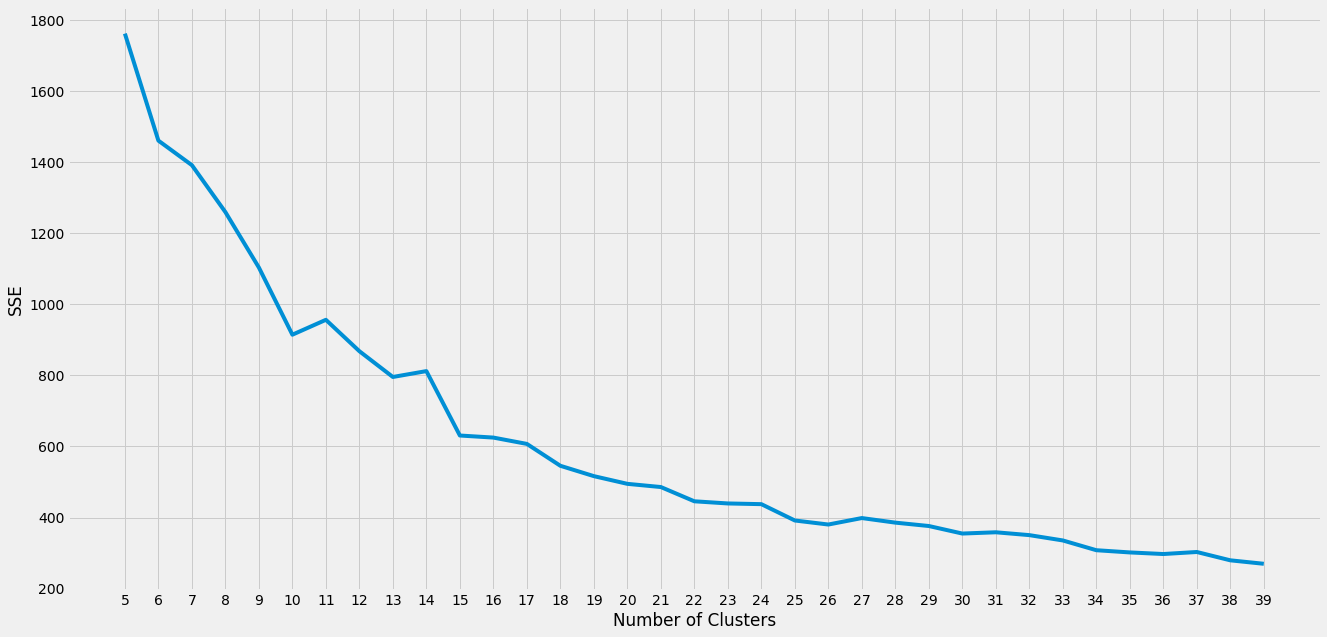

In [51]:
plt.figure(figsize=(20,10))
plt.style.use("fivethirtyeight")
plt.plot(range(5, 40), sse)
plt.xticks(range(5, 40))
plt.xlabel("Number of Clusters")
plt.ylabel("SSE")
plt.show()

In [52]:
# https://pypi.org/project/kneed/
# The knee point is the point of maximum curvature.
from kneed import KneeLocator

In [53]:
kl = KneeLocator(
    range(5, 40), sse, curve="convex", direction="decreasing"
)

kl.elbow

10

In [55]:
# fitting 10 clusters

In [56]:
kmeans = KMeans(
    init="random",
    n_clusters=10,
    n_init=10,
    max_iter=300,
    random_state=42
)

In [57]:
kmeans.fit(scaled_X)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [58]:
kmeans.labels_

array([0, 8, 0, 1, 1, 8, 0, 0, 0, 1, 0, 0, 0, 0, 0, 7, 0, 0, 1, 0, 0, 9,
       8, 0, 0, 8, 6, 0, 0, 3, 5, 1, 0, 8, 6, 0, 6, 1, 6, 0, 6, 0, 6, 1,
       2, 1, 1, 1, 9, 1, 0, 0, 0, 1, 6, 9, 2, 6, 0, 2, 8, 0, 5, 0, 0, 6,
       6, 6, 8, 0, 1, 2, 6, 0, 6, 6, 8, 4, 0, 0, 1, 2, 8, 6, 0, 0, 6, 6,
       0, 8, 0, 6, 0, 5, 0, 6, 8, 1, 9, 0, 2, 0], dtype=int32)

### We can visualize the clusters of counties on the map of illinois based on their coordinates  using the folium pacakage

In [61]:
illinois_map = folium.Map(location=[43.864073, -91.706819],zoom_start=5)

In [62]:
illinois_map